### 5개의 채널로된 RGB+DEPTH 합치기

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def load_rgb_depth_from_txt(txt_file):
    """
    주어진 TXT 파일에서 RGB와 Depth 데이터를 읽어옵니다.
    """
    with open(txt_file, 'r') as f:
        lines = f.readlines()

    # 헤더 제외, 데이터 읽기
    data = []
    for line in lines:
        if line.startswith("#"):
            continue  # 헤더 스킵
        values = list(map(float, line.strip().split()))
        data.append(values)

    # 데이터 배열화
    data = np.array(data)

    # RGB와 Depth 추출
    rgb = data[:, :3].astype(np.uint8)  # R, G, B (0~255)
    depth = data[:, 3]  # Depth 값
    return rgb, depth


In [30]:
import numpy as np
import matplotlib.pyplot as plt

def load_rgb_depth_from_txt(txt_file):
    """
    주어진 TXT 파일에서 RGB와 Depth 데이터를 읽어옵니다.
    """
    with open(txt_file, 'r') as f:
        lines = f.readlines()

    # 헤더 제외, 데이터 읽기
    data = []
    for line in lines:
        if line.startswith("#"):
            continue  # 헤더 스킵
        values = list(map(float, line.strip().split()))
        data.append(values)

    # 데이터 배열화
    data = np.array(data)

    # RGB와 Depth 추출
    rgb = data[:, :3].astype(np.uint8)  # R, G, B (0~255)
    depth = data[:, 3]  # Depth 값
    return rgb, depth



In [31]:
def visualize_rgb_and_depth_from_txt(txt_file):
    """
    TXT 파일에서 RGB와 Depth 데이터를 시각화하며, 유효하지 않은 Depth 영역은 투명 처리.
    """
    # TXT 파일에서 RGB, Depth 및 이미지 크기 정보 로드
    with open(txt_file, 'r') as f:
        lines = f.readlines()
        # 이미지 크기 정보 추출
        for line in lines:
            if line.startswith("# Image Size:"):
                img_size = line.strip().split(":")[1].strip()
                img_width, img_height = map(int, img_size.split("x"))
                break
        else:
            raise ValueError("Image size not found in the TXT file.")

    # RGB와 Depth 데이터 로드
    rgb, depth = load_rgb_depth_from_txt(txt_file)

    # 이미지 크기에 맞게 배열 변환
    rgb_image = rgb.reshape((img_height, img_width, 3))  # RGB 이미지를 (H, W, 3)으로 변환
    depth_image = depth.reshape((img_height, img_width))  # Depth 이미지를 (H, W)로 변환

    # 유효하지 않은 Depth 값 제거 (-1 또는 0 처리)
    valid_depth = depth_image > 0  # 유효한 Depth 값 필터링
    depth_normalized = np.zeros_like(depth_image, dtype=np.float32)
    if np.any(valid_depth):
        valid_depth_values = depth_image[valid_depth]
        depth_normalized[valid_depth] = (valid_depth_values - np.min(valid_depth_values)) / (np.max(valid_depth_values) - np.min(valid_depth_values) + 1e-6)

    # 깊이값이 없는 영역을 투명하게 처리 (RGBA)
    depth_colormap = plt.cm.viridis(depth_normalized)
    depth_colormap[~valid_depth, :] = [0, 0, 0, 0]  # 투명 처리

    # 시각화
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # RGB 이미지 표시
    axes[0].imshow(rgb_image)
    axes[0].set_title("RGB Image")
    axes[0].axis("off")

    # Depth 데이터 표시
    axes[1].imshow(depth_colormap)
    axes[1].set_title("Depth Map (Valid Only)")
    axes[1].axis("off")

    plt.tight_layout()
    plt.show()

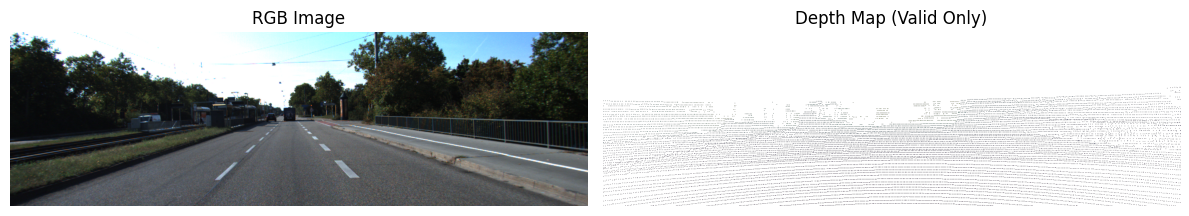

In [35]:
# 수정된 호출 방식
# txt_file_path = "/media/ssd3/lab/jojeon/KITTI/data_object/training/rgb_depth_intensity_delete/000573/000573-2.txt"

txt_file_path = "/media/ssd3/lab/jojeon/KITTI/data_object/training/rgb_depth_intensity/000399.txt"

visualize_rgb_and_depth_from_txt(txt_file_path)


겹쳐서 그리기

In [36]:
def overlay_rgb_and_depth_from_txt(txt_file):
    """
    TXT 파일에서 RGB와 Depth 데이터를 읽고 겹쳐서 시각화합니다.
    """
    # TXT 파일에서 RGB, Depth 및 이미지 크기 정보 로드
    with open(txt_file, 'r') as f:
        lines = f.readlines()
        # 이미지 크기 정보 추출
        for line in lines:
            if line.startswith("# Image Size:"):
                img_size = line.strip().split(":")[1].strip()
                img_width, img_height = map(int, img_size.split("x"))
                break
        else:
            raise ValueError("Image size not found in the TXT file.")

    # RGB와 Depth 데이터 로드
    rgb, depth = load_rgb_depth_from_txt(txt_file)

    # 이미지 크기에 맞게 배열 변환
    rgb_image = rgb.reshape((img_height, img_width, 3)) / 255.0  # RGB 이미지를 (H, W, 3)으로 변환 및 정규화
    depth_image = depth.reshape((img_height, img_width))  # Depth 이미지를 (H, W)로 변환

    # 유효하지 않은 Depth 값 제거 (-1 또는 0 처리)
    valid_depth = depth_image > 0  # 유효한 Depth 값 필터링
    depth_normalized = np.zeros_like(depth_image, dtype=np.float32)
    if np.any(valid_depth):
        valid_depth_values = depth_image[valid_depth]
        depth_normalized[valid_depth] = (valid_depth_values - np.min(valid_depth_values)) / (np.max(valid_depth_values) - np.min(valid_depth_values) + 1e-6)

    # 깊이값을 컬러맵으로 변환
    depth_colormap = plt.cm.viridis(depth_normalized)[:, :, :3]  # RGBA에서 RGB만 추출

    # 깊이값을 RGB 이미지 위에 투명도 적용하여 오버레이
    alpha = 1  # 투명도 설정 (0=완전히 투명, 1=완전히 불투명)
    overlay_image = (1 - alpha) * rgb_image + alpha * depth_colormap

    # 시각화
    fig, axes = plt.subplots(1, 1, figsize=(8, 6))
    axes.imshow(overlay_image)
    axes.set_title("RGB + Depth Overlay")
    axes.axis("off")

    plt.tight_layout()
    plt.show()


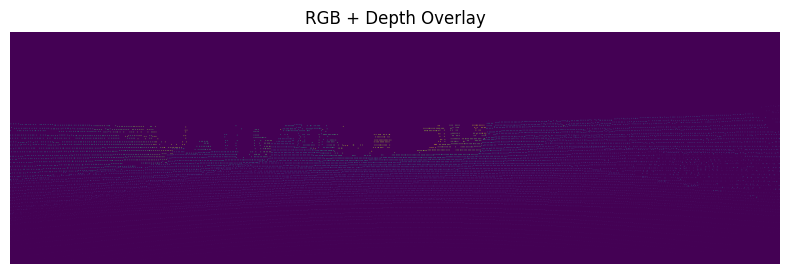

In [37]:
# TXT 파일 경로
overlay_rgb_and_depth_from_txt(txt_file_path)